# Data Analysis with PyROOT

While ROOT is natively a C++ framework, it can also be used in Python. To do this, CERN has created PyROOT, a ROOT library in Python. PyROOT is extremely similar to ROOT, and it is often called "Python-flavored ROOT". To use PyROOT, you only need to have <a href="https://root.cern/install/">ROOT installed</a>. To check if ROOT is installed, run <code>root --version</code>. Once it is installed, simply run

In [1]:
import ROOT

Welcome to JupyROOT 6.22/06


to import PyROOT into your Python 3 Notebook.

## Opening Files

To begin working with PyROOT, we must first open a ROOT file in the notebook. Throughout this tutorial, we will use data from an experiment run in Hall A of Jefferson Lab using the hadronic calorimeter (HCal) to measure the radius of nucleons. If you would like to follow along, you can download the file <a href="https://hallaweb.jlab.org/users/camsonne/SULI/hcal_gmn_fullreplay_13747_stream0_seg0_0.root">here</a>. To open the file, we use PyROOT's <code>TFile()</code> function, similar to ROOT. For example:

In [2]:
f = ROOT.TFile("/lustre19/expphy/volatile/halla/sbs/seeds/rootfiles/hcal_gmn_fullreplay_13747_stream0_seg0_0.root")

Warning in <TClass::Init>: no dictionary for class THaRunParameters is available
Warning in <TClass::Init>: no dictionary for class THaEvent is available
Warning in <TClass::Init>: no dictionary for class THaEventHeader is available
Warning in <TClass::Init>: no dictionary for class THaRun is available
Warning in <TClass::Init>: no dictionary for class THaCodaRun is available
Warning in <TClass::Init>: no dictionary for class THaRunBase is available
Warning in <TClass::Init>: no dictionary for class DAQInfoExtra is available
Warning in <TClass::Init>: no dictionary for class DAQconfig is available


From here, we can use the <code>Get()</code> method to access the <code>'T'</code> TTree in <code>f</code> like so

In [3]:
T = f.Get('T')

## Reading the TTree

After we have created our TTree object, we can read the TTree structure by calling the <code>Print()</code> method on <code>T</code>.

In [4]:
T.Print()

******************************************************************************
*Tree    :T         : Hall A Analyzer Output DST                             *
*Entries :    31213 : Total =      6098972041 bytes  File  Size = 1505818336 *
*        :          : Tree compression factor =   4.05                       *
******************************************************************************
*Br    0 :Ndata.bb.grinch_adc.a : Ndata.bb.grinch_adc.a/I                    *
*Entries :    31213 : Total  Size=     130366 bytes  File Size  =      33621 *
*Baskets :       49 : Basket Size=       6144 bytes  Compression=   3.84     *
*............................................................................*
*Br    1 :bb.grinch_adc.a : bb.grinch_adc.a[Ndata.bb.grinch_adc.a]/D         *
*Entries :    31213 : Total  Size=    1706438 bytes  File Size  =    1514903 *
*Baskets :       50 : Basket Size=      82944 bytes  Compression=   1.13     *
*...................................................

PyROOT prints out the TTree structure which shows the branches of the TTree. We are now able to read the TTree and the variables of its branches. The example TTree contains data from all the detectors in Hall A of Jefferson Lab. The branches in the TTree are prefixed with either <code>bb</code> or <code>sbs</code>, meaning BigBite and SuperBigBite, respectively. From there you can see the specific detectors in both BB and SBS, such as the HCal, GRINCH, or GEMs. A complete list of the detector variables and their definitions can be found <a href="https://sbs.jlab.org/wiki/index.php/SBS_Replay_Variable_Names">here</a>.

## Graphing with PyROOT

To start graphing in PyROOT, we first need to create a canvas to graph on using ROOT's TCanvas object. To do this, we can use PyROOT's <code>TCanvas()</code> function like so

In [5]:
c = ROOT.TCanvas("c", "c", 800, 600)

We have created an TCanvas object <code>c</code> named "c" with a title of "c", a width of 800, and a height of 600. Now, we can graph a branch of our TTree <code>T</code> onto our canvas <code>c</code>. For example, lets graph a histogram of the energy readings from the HCal detector in SuperBigBite:

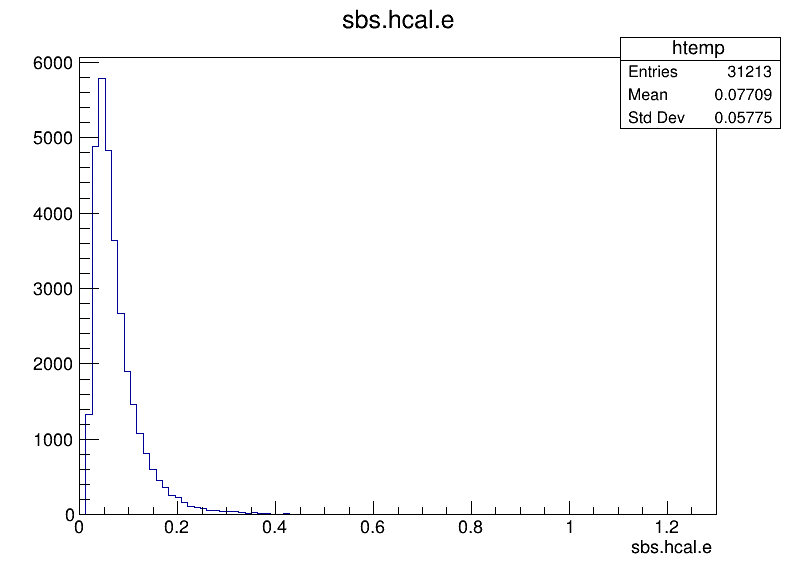

In [6]:
T.Draw("sbs.hcal.e")
c.Draw()

We use the <code>Draw()</code> method of <code>T</code> to draw a branch onto our canvas. We pass in the argument <code>"sbs.hcal.e"</code> to specify that we want to draw the branch of energy from HCal in SuperBigBite. After we draw the data onto our canvas, we need to call <code>Draw()</code> once more on our canvas <code>c</code> to output our graph.

## 2D Graphs

Using PyROOT, it is possible to plot 2D graphs of two branches from our TTree. We can do this by joining two branches together inside the <code>Draw()</code> function using a colon like so  

In [7]:
T.Draw("sbs.hcal.y:sbs.hcal.x")

Here, we have drawn a scatter plot of the x and y positions of the particles in HCal. Since we have not created a new canvas, the <code>Draw()</code> function draws the graph onto the canvas <code>c</code>. Since the old graph has now be overwritten, we can output the new graph by calling <code>Draw()</code> on <code>c</code> again.

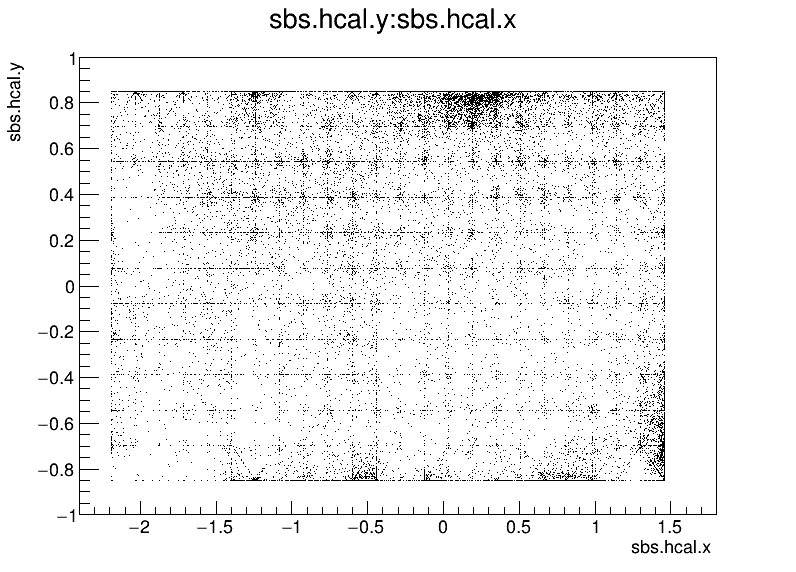

In [8]:
c.Draw()

We can do the same thing with data from the Shower electric calorimeter in the BigBite detector. We can plot a graph of the energy versus x position of particles like so 

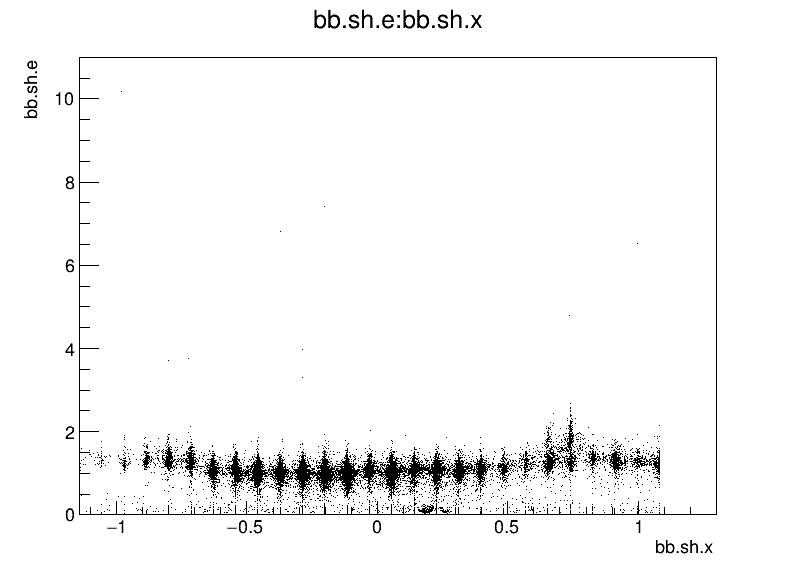

In [9]:
T.Draw("bb.sh.e:bb.sh.x")
c.Draw()

## 3D Graphs

Similar to 2D graphs, it is possible to create 3D graphs using PyROOT by simply adding another branch inside the <code>Draw()</code> function like so

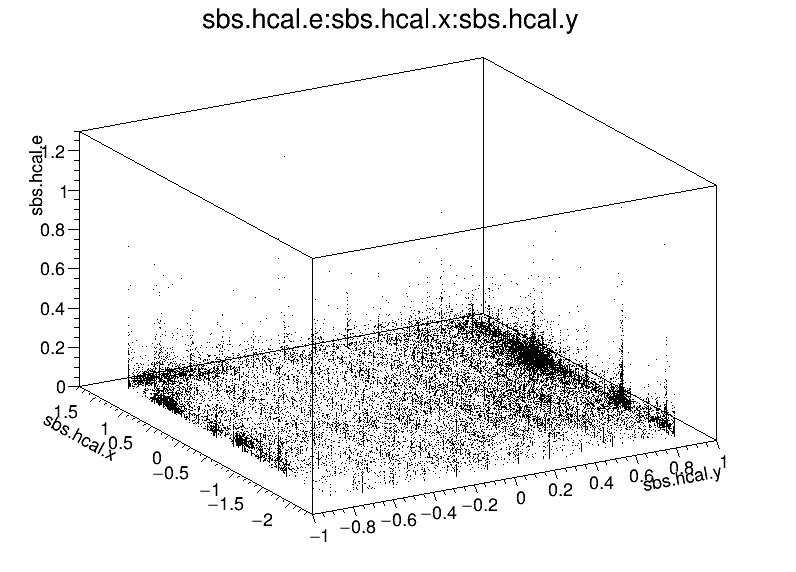

In [10]:
T.Draw("sbs.hcal.e:sbs.hcal.x:sbs.hcal.y")
c.Draw()

Here we have created a 3D graph of the x position, y position, and energy of particles from HCAl in SuperBigBite by joining the three branches of the TTree together using a colon.<br>
<br>
It is also possible to plot a third dimension using color. For example, we can plot a graph of the x and y positions of particles, and use color to show their energy:

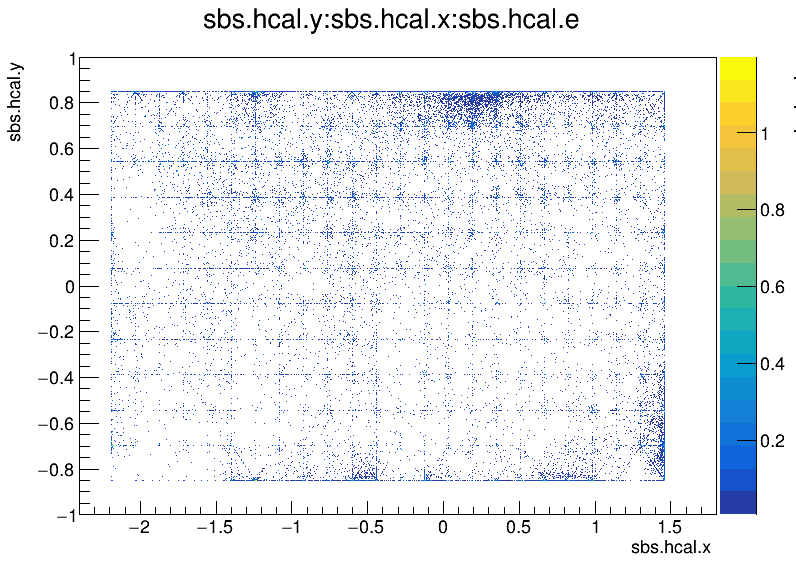

In [11]:
T.Draw("sbs.hcal.y:sbs.hcal.x:sbs.hcal.e", "", "colz")
c.Draw()

By inputting the option of <code>"colz"</code> into the <code>Draw()</code> function, we are able to create a 2D graph with color showing a third dimension. <code>"colz"</code> is only one of the drawing options available in ROOT and PyROOT. For a complete list of drawing options visit the ROOT documentation of histograms <a href="https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html#drawing-histogramsf">here</a>.

## Cuts

### Energy Cuts

To remove the lower energy pions and muons produced in a shower, an energy cut may be performed on the data. If the right energy cut is applied, only the clusters resulting from the nucleons would remain.
<br>
<br>
Performing cuts in PyROOT is very similar to ROOT, and very easy. Simply add a second argument to the <code>Draw()</code> function specifying the condition for the cut.
For example:

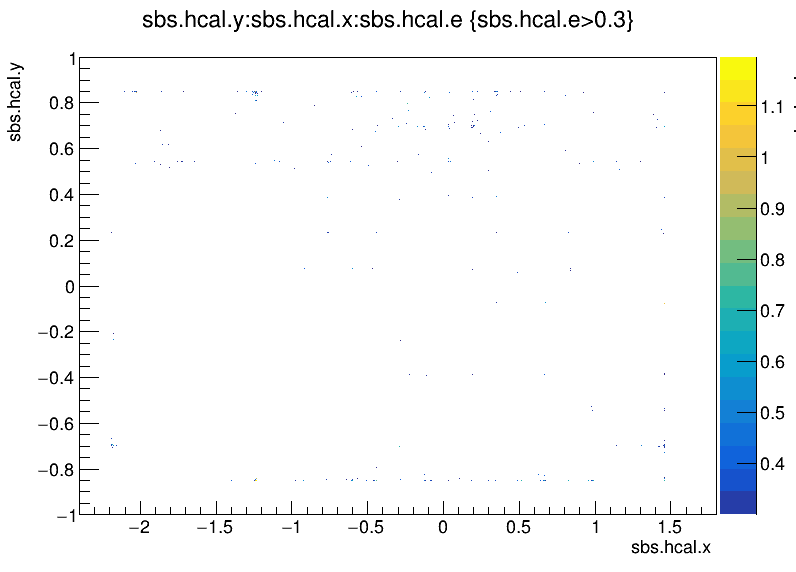

In [12]:
T.Draw("sbs.hcal.y:sbs.hcal.x:sbs.hcal.e", "sbs.hcal.e>0.3", "colz") 
c.Draw()

Here we have the same graph as the previous step, except we have cut all particles with an energy lower than 0.3.

### Position Cuts

Similar to energy cuts, position cuts can be performed on a data set in PyROOT to isolate particles in a certain position. In SBS's HCal, a magnetic force pushes protons upward while neutrons remain unaffected. This results in protons have a higher y position than neutrons. Because of this, we can perform a cut based on y position to attempt to isolate neutrons or protons. For example:

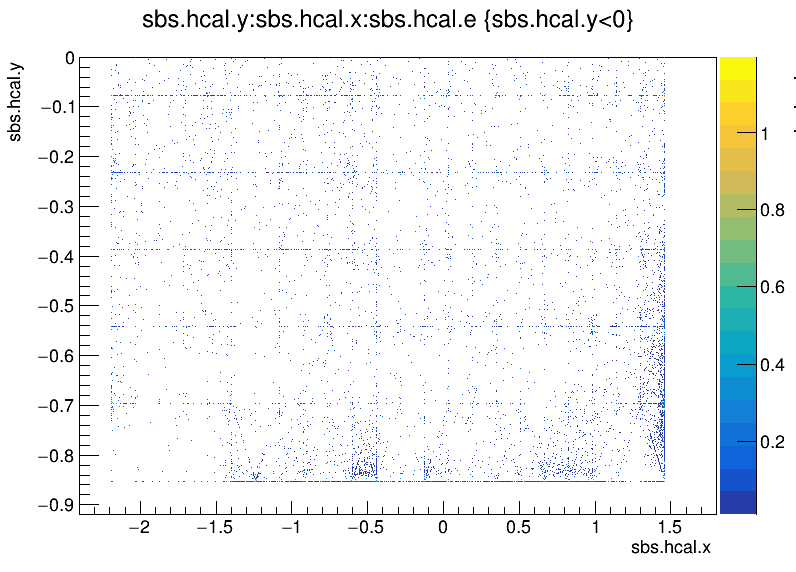

In [13]:
T.Draw("sbs.hcal.y:sbs.hcal.x:sbs.hcal.e", "sbs.hcal.y<0", "colz")
c.Draw()

Here we have replicated the previous 2D graph, where color represents the third dimension of energy; however, we have cut all y values above 0 to isolate any neutrons. Nevertheless, this graph is still difficult to read due to background noise. However, if we apply an energy cut as well to major on particles with significant energy, we get the following:

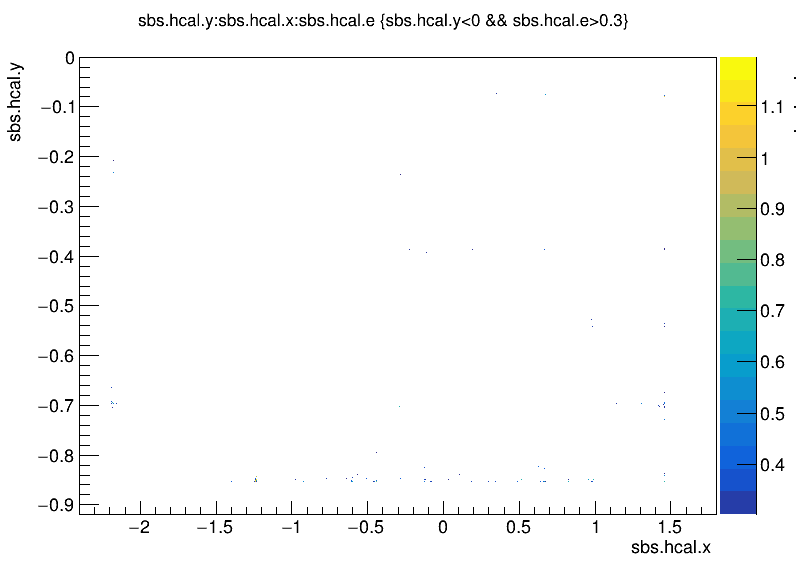

In [14]:
T.Draw("sbs.hcal.y:sbs.hcal.x:sbs.hcal.e", "sbs.hcal.y<0 && sbs.hcal.e>0.3", "colz")
c.Draw()

Now we have eliminated most of the protons and low energy background noise, so we can see some clusters of neutrons. Though more data is needed to show distinct findings, this is an example of how to perform cuts in PyROOT to focus on significant data.

### Advanced Cuts

The example cuts above are very primitive, only including one or two conditions of data taken only from HCal. Generally, physicists analyzing data from the ROOT TTree will employ more advanced cuts using information from multiple detectors to major in on specific events. Below is an example of a cut performed on the example ROOT TTree file to create a proton spot plot.

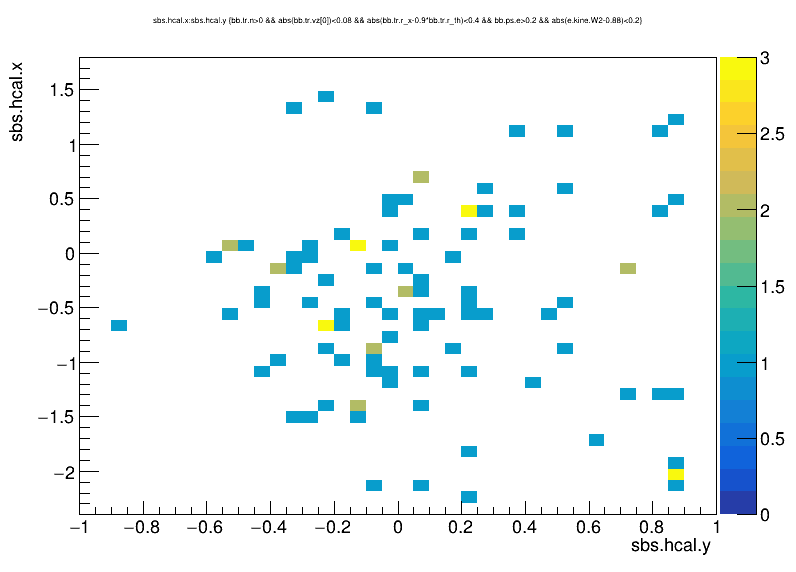

In [17]:
T.Draw("sbs.hcal.x:sbs.hcal.y", "bb.tr.n>0 && abs(bb.tr.vz[0])<0.08 && abs(bb.tr.r_x-0.9*bb.tr.r_th)<0.4 && bb.ps.e>0.2 && abs(e.kine.W2-0.88)<0.2", "colz")
c.Draw()

Another common practice among physicists is to draw cuts on top of an uncut graph to show the changes in the data. To do this, we have to create two separate histogram objects of the uncut and cut data. To create a histogram object, we can use ROOT's <code>TH1D()</code> function. After creating the histogram objects, we can use the <code>Draw()</code> function to draw the data onto the histograms.

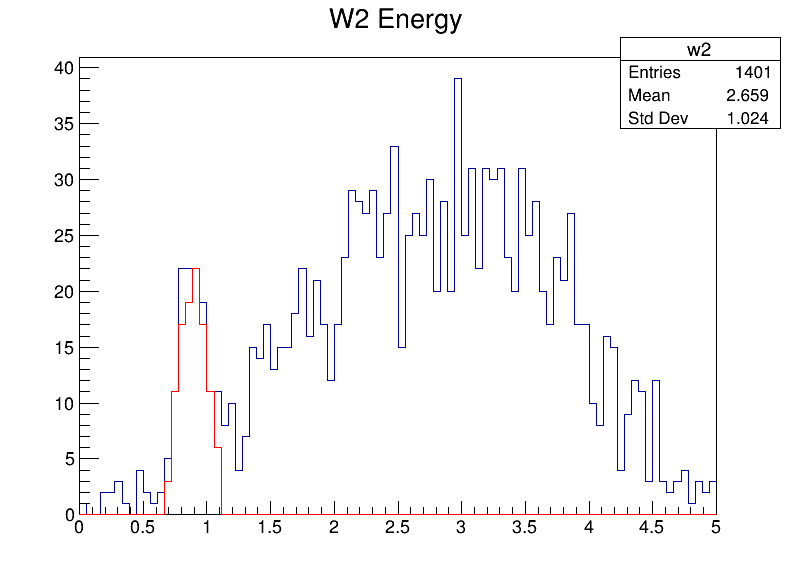

In [16]:
w2 = ROOT.TH1D("W2", "W2", 90, 0, 5)
ph = ROOT.TH1D("ph", "ph", 90, 0, 5)

T.Draw("e.kine.W2>>w2", "e.kine.W2<1000")
T.Draw("e.kine.W2>>ph", "bb.tr.n>0 && abs(bb.tr.vz[0])<0.08 && abs(bb.tr.r_x-0.9*bb.tr.r_th)<0.4 && bb.ps.e>0.2 && abs(e.kine.W2-0.88)<0.2", "same")

ph.SetLineColor(2)

c.Draw()

In this example we passed <code>"W2"</code> into the <code>TH1D()</code> function for both the name and the title of the W2 energy histogram, <code>90</code> for the number of bins, and then <code>0</code> and <code>5</code> for the x minimum and maximum. We repeated this process to create another histogram for the proton cuts. We called the <code>Draw()</code> function using <code>>></code> to direct the data onto our designated histograms, and then <code>SetLineColor()</code> on the <code>ph</code> histogram with an input of <code>2</code> to set that histogram to be red.

The final product is a graph containing the uncut data of W2 energy in blue with an overlayer of red showing the data with the appropriate cuts to highlight protons.